In [2]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt

from datetime import datetime

import statsmodels.api as sm
import pylab as py


import itertools

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
file = open('NetSense_network.pkl', 'rb')
# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

Showing the pickled data:
The data  0  is :  1
The data  1  is :  2
The data  2  is :  3
The data  3  is :  4
The data  4  is :  5
The data  5  is :  6


In [4]:
#creating list of attributes
list_of_attributes = set([k for n in data[1].nodes for k in data[1].nodes[n].keys()])

#creating possible attribute values
attribute_values = dict((attribute, set() ) for attribute in list_of_attributes)

for sem in range(1,7):
    for node in data[sem].nodes():
        for attribute in list_of_attributes:
            attribute_values[attribute].add(data[sem].nodes[node][attribute])

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

{'age_1': {1, 2},
 'hometown_1': {1, 2, 3},
 'euthanasia_': {1, 2, 3},
 'gaymarriage_': {1, 2, 3},
 'gender_1': {1, 2},
 'ethnicity_1': {1, 2, 3, 4},
 'marijuana_': {1, 2, 3},
 'deathpen_': {1, 2, 3},
 'homosexual_': {1, 2, 3},
 'premaritalsex_': {1, 2, 3},
 'abortion_': {1, 2, 3},
 'political_': {1, 2, 3}}

In [5]:
#creating table of attribute values
attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    attributes[i] = np.zeros([len(data[i].nodes), len(list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(list_of_attributes):
            attributes[sem][i,j] = data[sem].nodes[node][attribute]

In [6]:
attributes

{1: array([[1., 1., 3., ..., 3., 3., 1.],
        [1., 1., 2., ..., 2., 2., 1.],
        [1., 1., 3., ..., 3., 3., 3.],
        ...,
        [2., 1., 2., ..., 3., 1., 2.],
        [2., 3., 2., ..., 1., 1., 1.],
        [2., 1., 3., ..., 3., 3., 2.]]),
 2: array([[2., 3., 3., ..., 1., 1., 1.],
        [2., 1., 1., ..., 1., 1., 1.],
        [1., 1., 3., ..., 3., 1., 1.],
        ...,
        [1., 1., 1., ..., 3., 1., 1.],
        [1., 2., 3., ..., 3., 1., 1.],
        [1., 1., 2., ..., 2., 2., 3.]]),
 3: array([[1., 2., 3., 3., 2., 1., 1., 1., 3., 3., 3., 2.],
        [1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.],
        [2., 2., 1., 2., 2., 1., 3., 1., 1., 1., 1., 2.],
        [1., 1., 3., 3., 2., 3., 3., 3., 3., 3., 1., 3.],
        [2., 1., 3., 3., 1., 1., 2., 1., 3., 3., 3., 1.],
        [1., 1., 3., 3., 2., 2., 1., 1., 1., 1., 3., 2.],
        [1., 2., 2., 3., 1., 1., 2., 1., 3., 3., 1., 1.],
        [2., 2., 2., 3., 2., 1., 1., 1., 3., 3., 3., 3.],
        [1., 1., 1., 1., 1., 

In [7]:
df = pd.DataFrame(data=attributes[1], columns=attribute_values)
print(df)

    age_1  hometown_1  euthanasia_  gaymarriage_  gender_1  ethnicity_1  \
0     1.0         1.0          3.0           3.0       2.0          2.0   
1     1.0         1.0          2.0           1.0       2.0          2.0   
2     1.0         1.0          3.0           3.0       1.0          2.0   
3     2.0         1.0          1.0           3.0       1.0          2.0   
4     2.0         1.0          1.0           2.0       1.0          2.0   
..    ...         ...          ...           ...       ...          ...   
93    1.0         2.0          3.0           1.0       1.0          1.0   
94    1.0         1.0          3.0           1.0       2.0          2.0   
95    2.0         1.0          2.0           1.0       1.0          4.0   
96    2.0         3.0          2.0           2.0       2.0          1.0   
97    2.0         1.0          3.0           3.0       1.0          1.0   

    marijuana_  deathpen_  homosexual_  premaritalsex_  abortion_  political_  
0          2.0     

In [8]:

ord_list_of_attributes = list_of_attributes - {'ethnicity_1', 'gender_1', 'hometown_1', 'age_1'}
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    ord_attributes[i] = np.zeros([len(data[i].nodes), len(ord_list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(ord_list_of_attributes):
            ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
print(ord_attributes)

{'gaymarriage_', 'euthanasia_', 'marijuana_', 'deathpen_', 'homosexual_', 'premaritalsex_', 'abortion_', 'political_'}
{1: array([[3., 3., 2., 3., 3., 3., 3., 1.],
       [1., 2., 3., 2., 2., 2., 2., 1.],
       [3., 3., 3., 3., 1., 3., 3., 3.],
       [3., 1., 2., 1., 3., 3., 3., 3.],
       [2., 1., 1., 2., 3., 3., 3., 2.],
       [1., 3., 1., 1., 1., 1., 1., 2.],
       [2., 1., 1., 2., 2., 1., 1., 1.],
       [2., 2., 3., 2., 1., 1., 2., 2.],
       [3., 3., 2., 1., 3., 3., 3., 2.],
       [3., 1., 3., 1., 3., 3., 1., 3.],
       [1., 3., 2., 1., 1., 1., 1., 2.],
       [2., 1., 1., 1., 1., 1., 1., 1.],
       [3., 2., 3., 1., 3., 3., 1., 1.],
       [1., 1., 3., 1., 2., 1., 1., 1.],
       [3., 3., 3., 3., 3., 3., 1., 3.],
       [1., 3., 2., 1., 2., 2., 1., 1.],
       [1., 2., 2., 2., 1., 3., 1., 1.],
       [1., 3., 3., 3., 1., 1., 1., 1.],
       [3., 3., 3., 2., 3., 2., 3., 3.],
       [3., 3., 3., 1., 1., 3., 1., 1.],
       [3., 3., 3., 3., 3., 3., 3., 1.],
       [3., 3., 

## Max difference of new attributes

In [9]:
def calc_distance(agent1, agent2, scale = 1):
    return np.sum(np.abs(agent1-agent2)) / len(agent1) / scale

def calc_distances(agents, scale = 1):
    N, A = agents.shape
    
    distances = np.zeros([N,N])
    
    for i in range(0,N):
        for j in range(i+1,N):
            distances[i,j] = calc_distance(agents[i], agents[j], scale)
            distances[j,i] = distances[i,j]
    return distances


In [10]:
ord_attributes[1][[53,79,94]], ord_list_of_attributes

(array([[3., 1., 1., 1., 1., 1., 1., 1.],
        [3., 1., 1., 1., 1., 1., 1., 1.],
        [1., 3., 3., 3., 3., 3., 3., 3.]]),
 {'abortion_',
  'deathpen_',
  'euthanasia_',
  'gaymarriage_',
  'homosexual_',
  'marijuana_',
  'political_',
  'premaritalsex_'})

In [12]:
def calc_link_polarity2(agent1, agent2, th, attr_dif):
    return calc_distance(agent1, agent2, attr_dif) <= th

def calc_link_polarities2(agents, th, attr_dif):
    N, A = agents.shape
    
    polarities = (calc_distances(agents, attr_dif) <= th)*2 - 1 - np.eye(N)
    
    return polarities

def balanced_triad_density(polarities):
    N = polarities.shape[0]
    return (np.sum(np.matmul(polarities,polarities) * polarities) / 6 / (N*(N-1)*(N-2)/6) + 1)/2

In [14]:
# polarities = calc_link_polarities2(dcor_attributes[1], 0.5)
pol2 = calc_link_polarities2(ord_attributes[1], 0.5, 2)
balanced_triad_density(pol2)

0.7293682937092363

In [15]:
def balanced_triad_density_network(polarities, triads):
    T = len(triads)
    dens = 0.
    for triad in triads:
        i, j, k = triad
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            dens = dens + 1
    dens = dens / T
    return dens

def get_triads_polarity(polarities, triads):
    Ts = len(triads)
    
    t_pol = np.zeros(Ts) 
    t_pol_type = np.zeros(Ts)
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        pols = [polarities[i,j], polarities[i,k], polarities[k,j]]
        
        t_pol_type[t] = 3-(sum(pols)+3)/2
        
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            t_pol[t] = 1
        else:
            t_pol[t] = -1
    
    return t_pol, t_pol_type

def count_triads_types(polarities, triads):
    t_pol, t_pol_type = get_triads_polarity(polarities, triads)
    
    t2 = np.array(t_pol_type)
    triads_type = [sum(t2 == i) for i in range(0,4)]
    
    return triads_type


In [16]:
def get_triads(net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]

    triads = []

    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                for k in range(j+1,N):
                    if A[i,k] > 0 and A[j,k] > 0:
                        triads.append((i,j,k))
    
    return triads

def get_triads_strength(triads, net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]
    Ts = len(triads)
    
    s_mul = np.zeros(Ts) #multiplicative strength
    s_add = np.zeros(Ts) #additive strength
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        s_mul[t] = A[i,j] * A[i,k] * A[j,k]
        s_add[t] = A[i,j] + A[i,k] + A[j,k]
    
    return s_mul, s_add

In [18]:
sem = 1
triads = get_triads(data[sem])

polarities = calc_link_polarities2(ord_attributes[sem], 0.1, 2)

balanced_triad_density_network(polarities, triads), balanced_triad_density(polarities)

(0.06666666666666667, 0.06435409215232485)

In [21]:
sem = 4
triads = get_triads(data[sem])

thetas = np.linspace(0,1,101)

bals = np.zeros(len(thetas))
all_bals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    polarities = calc_link_polarities2(ord_attributes[sem], theta, 2)
    bals[i] = balanced_triad_density_network(polarities, triads)
    all_bals[i] = balanced_triad_density(polarities)


Text(0, 0.5, 'density of balanced triads')

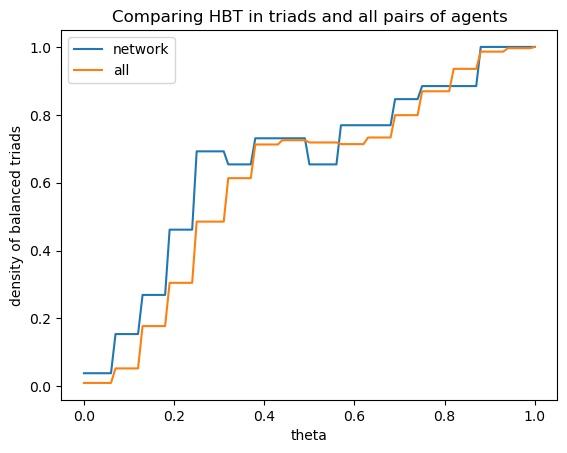

In [22]:
plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Comparing HBT in triads and all pairs of agents")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

# E8

In [23]:
sem = 1
th = 0.4

polarities = calc_link_polarities2(ord_attributes[sem], th, 2)
N = polarities.shape[0]

rho = np.sum(polarities == 1)/2 / N/(N-1)*2

prob_balanced = np.power(rho,3) + 3*rho*np.power(1-rho,2)

triads = get_triads(data[sem])
balanced_triad_density_network(polarities, triads), prob_balanced

(0.7111111111111111, 0.4985293548426973)

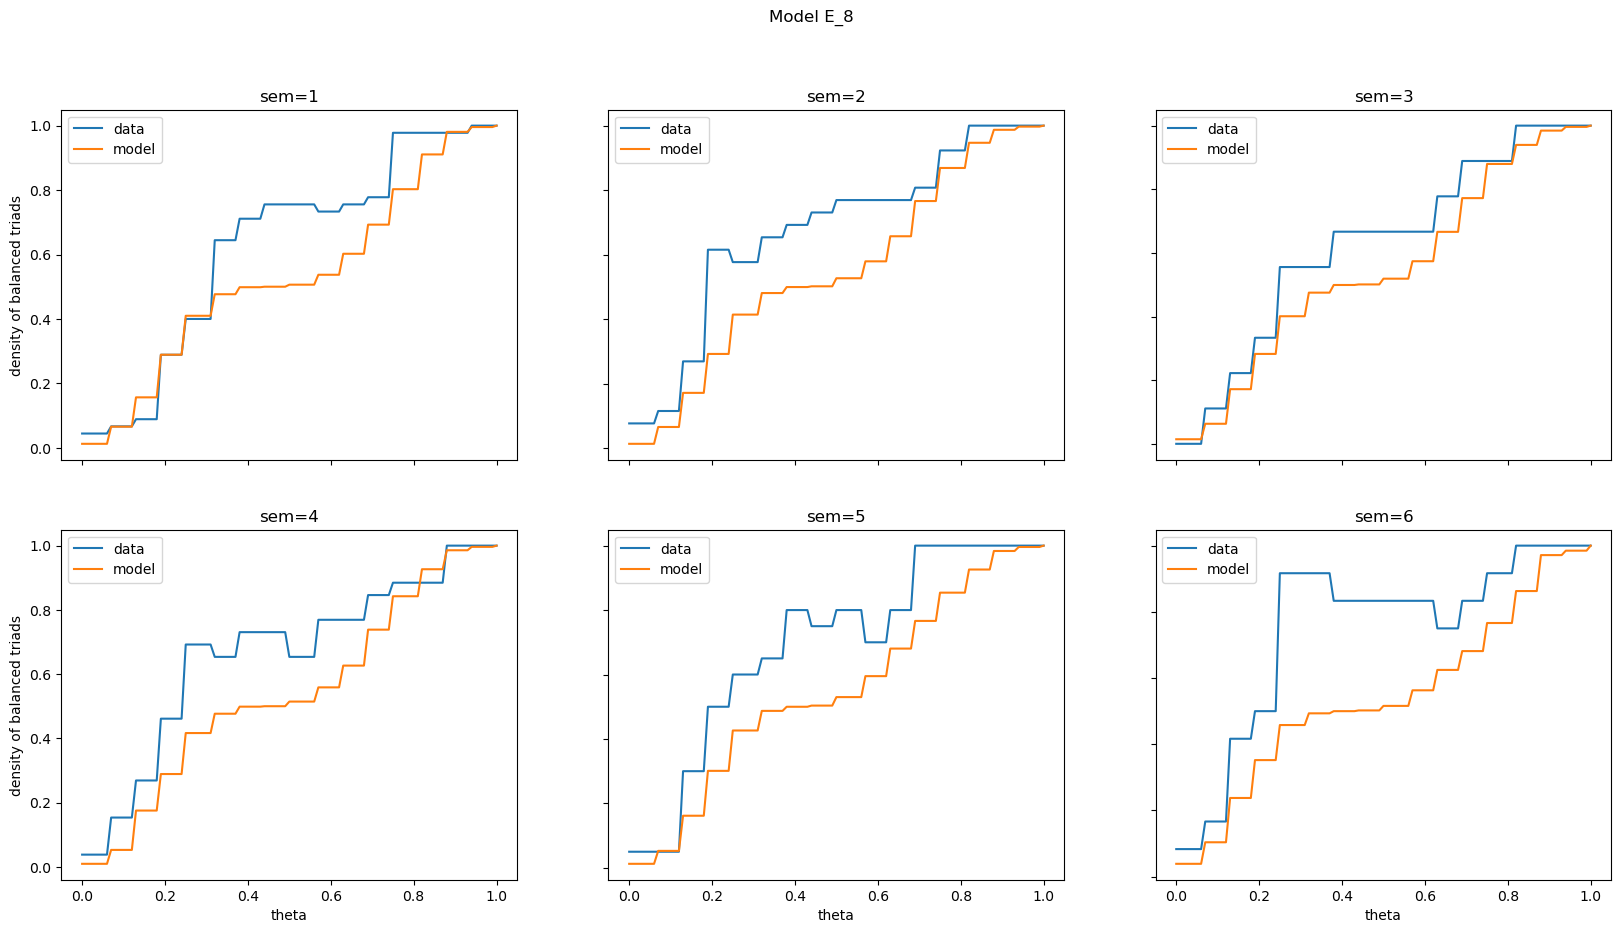

In [24]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Model E_8")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        prob_bals = np.zeros(len(thetas))
        bals = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(ord_attributes[semm], theta, 2)
            
            N = polarities.shape[0]
            rho = np.sum(polarities == 1)/2 / N/(N-1)*2
            prob_bals[i] = np.power(rho,3) + 3*rho*np.power(1-rho,2)
            
            triads = get_triads(data[semm])
            bals[i] = balanced_triad_density_network(polarities, triads)
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, thetas, prob_bals)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["data", "model"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Analiza statystyczna powyższego

In [25]:
def distribute_random_polarities(N, rho):
    polarities = np.zeros([N,N], dtype = int)
    
    for i in range(0,N):
        for j in range(i+1, N):
            polarities[i,j] = 1 if np.random.random() < rho else -1
            polarities[j,i] = polarities[i,j]
    return polarities

def calc_pval_E8(triads, agents, th, attr_dif, M):
    """
    triads - list of sets of node ids forming a triad
    agents - array of vectors of agent attributes
    th - threshold used
    attr_dif - max difference between attributes
    M - number of times to repeat randomization
    """
    polarities = calc_link_polarities2(agents, th, attr_dif)
    bal_dens = balanced_triad_density_network(polarities, triads)
    
    N = polarities.shape[0]
    rho = np.sum(polarities == 1)/2 / N/(N-1)*2
    
    bal_dens_rands = np.zeros(M)
    
    for i in range(0,M):
        polarities_rand = distribute_random_polarities(N, rho)
        bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)
        
    pval = np.sum(bal_dens_rands >= bal_dens)
    
    return bal_dens_rands, bal_dens, pval

def compare_networks2(fun, data, th, attr_dif, M):
    pvals = np.zeros(6)
    vals = np.zeros(6)
    stds = np.zeros(6)
    difs = np.zeros(6)
    
    for n in range(1,7):
#         print(n)
        net = data[n]
        triads = get_triads(net)
        agents = dcor_attributes[n]
        
        bal_dens_rands, bal_dens, pval = fun(triads, agents, th, attr_dif, M)
        pvals[n-1] = pval
        vals[n - 1] = bal_dens
        difs[n-1] = np.mean(bal_dens - bal_dens_rands)
        stds[n-1] = np.std(difs)
    return pvals, vals, difs, stds

In [28]:
sem = 1
th = 0.3

polarities = calc_link_polarities2(ord_attributes[sem], th, 2)
N = polarities.shape[0]

rho = np.sum(polarities == 1)/2 / N/(N-1)*2
pol_rand = distribute_random_polarities(N, rho)

triads = get_triads(data[sem])
balanced_triad_density_network(polarities, triads), balanced_triad_density_network(pol_rand, triads)



(0.4, 0.5333333333333333)

In [29]:
M = 100
calc_pval_E8(triads, ord_attributes[sem], th, 2, M)

(array([0.556, 0.467, 0.378, 0.422, 0.489, 0.444, 0.422, 0.444, 0.467,
        0.422, 0.578, 0.378, 0.489, 0.378, 0.311, 0.378, 0.311, 0.333,
        0.422, 0.422, 0.378, 0.422, 0.378, 0.244, 0.289, 0.222, 0.511,
        0.267, 0.467, 0.333, 0.467, 0.356, 0.578, 0.378, 0.356, 0.333,
        0.311, 0.422, 0.289, 0.511, 0.444, 0.6  , 0.489, 0.378, 0.333,
        0.467, 0.556, 0.467, 0.489, 0.467, 0.422, 0.511, 0.511, 0.422,
        0.289, 0.511, 0.311, 0.333, 0.311, 0.444, 0.511, 0.4  , 0.4  ,
        0.467, 0.444, 0.4  , 0.4  , 0.444, 0.444, 0.511, 0.422, 0.356,
        0.311, 0.356, 0.378, 0.244, 0.289, 0.311, 0.378, 0.356, 0.222,
        0.356, 0.467, 0.578, 0.4  , 0.356, 0.467, 0.444, 0.444, 0.489,
        0.467, 0.422, 0.222, 0.422, 0.378, 0.422, 0.289, 0.267, 0.444,
        0.6  ]),
 0.4,
 58)

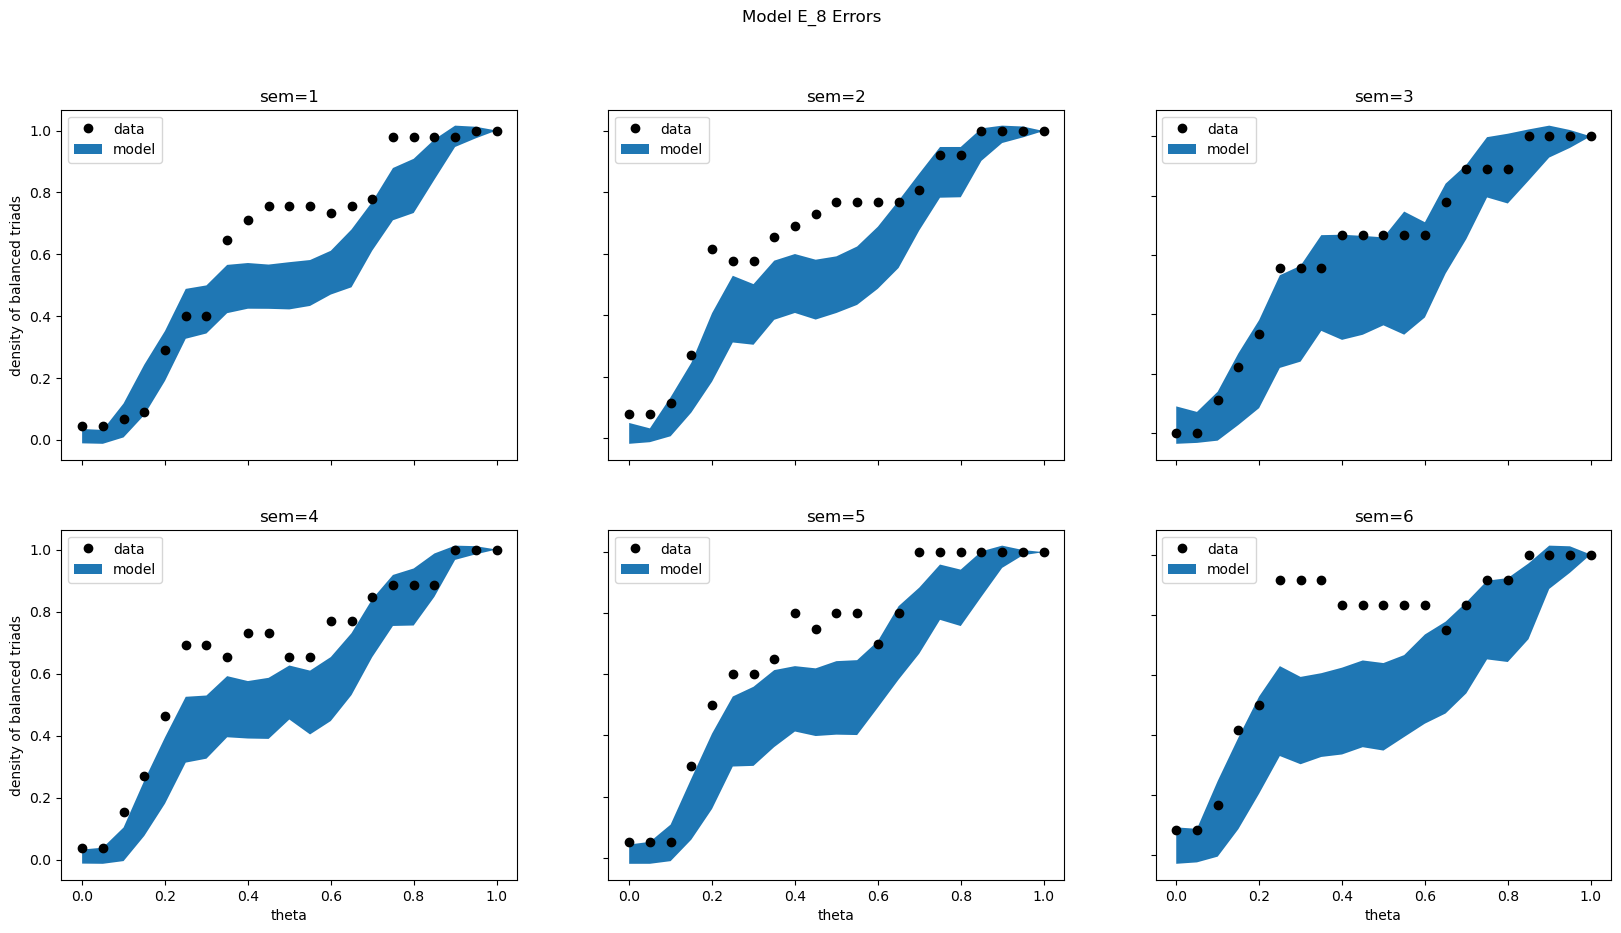

In [30]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,21)
M = 100

pvals = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Model E_8 Errors")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        prob_bals_mean = np.zeros(len(thetas))
        prob_bals_std = np.zeros(len(thetas))
        bals = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            triads = get_triads(data[semm])
            bal_dens_rands, bal_dens, pval = calc_pval_E8(triads, ord_attributes[semm], theta, 2, M)
            
            prob_bals_mean[i] = np.mean(bal_dens_rands)
            prob_bals_std[i] = np.std(bal_dens_rands)
            pvals[semm][i] = pval
            
            bals[i] = bal_dens
        
        axs[a1, a2].set_title("sem=" + str(semm))
        # axs[a1,a2].plot(thetas, bals, thetas, prob_bals)
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, prob_bals_mean-prob_bals_std, prob_bals_mean+prob_bals_std)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["data", "model"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [54]:
calc_pval_E8(triads, ord_attributes[semm], 0.05, 2, M)

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.083, 0.   ,
        0.083, 0.   , 0.   , 0.   , 0.   , 0.083, 0.   , 0.   , 0.   ,
        0.167, 0.   , 0.   , 0.25 , 0.167, 0.   , 0.083, 0.   , 0.083,
        0.   , 0.083, 0.   , 0.   , 0.083, 0.167, 0.   , 0.   , 0.   ,
        0.083, 0.   , 0.   , 0.   , 0.083, 0.083, 0.   , 0.   , 0.083,
        0.   , 0.083, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.083, 0.   , 0.083, 0.   , 0.   , 0.083, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.083, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.167,
        0.   , 0.167, 0.   , 0.083, 0.   , 0.   , 0.083, 0.   , 0.   ,
        0.   , 0.   , 0.083, 0.   , 0.   , 0.083, 0.   , 0.   , 0.   ,
        0.   ]),
 0.08333333333333333,
 26)

In [55]:
sem = 6
th = 0.05

polarities = calc_link_polarities2(ord_attributes[sem], th)
N = polarities.shape[0]

rho = np.sum(polarities == 1)/2 / N/(N-1)*2
pol_rand = distribute_random_polarities(N, rho)

triads = get_triads(data[sem])
balanced_triad_density_network(polarities, triads), balanced_triad_density_network(pol_rand, triads)



(0.08333333333333333, 0.0)

In [56]:
pvals

{1: array([ 11.,  18.,  55.,  77.,  56.,  50.,  59.,   1.,   1.,   1.,   0.,
          0.,   2.,   7.,  22.,   1.,   1.,  20.,  89.,  92., 100.]),
 2: array([  5.,   8.,  33.,  17.,   0.,  11.,  11.,   6.,   2.,   2.,   1.,
          0.,   8.,  20.,  34.,  32.,  39.,  45.,  79.,  96., 100.]),
 3: array([100., 100.,  42.,  43.,  46.,  31.,  28.,  38.,  25.,  20.,  25.,
         29.,  50.,  38.,  37.,  76.,  61.,  52.,  88.,  95., 100.]),
 4: array([ 16.,  27.,   6.,  19.,   8.,   2.,   1.,   7.,   1.,   3.,   7.,
         16.,   4.,   6.,  18.,  32.,  43.,  83.,  74.,  99., 100.]),
 5: array([ 19.,  15.,  52.,  13.,   9.,   7.,  12.,  12.,   0.,   2.,   0.,
          2.,  23.,  24.,   2.,  11.,  16.,  34.,  85.,  95., 100.]),
 6: array([ 27.,  35.,  45.,   9.,  25.,   0.,   0.,   0.,   2.,   2.,   3.,
          2.,   6.,  32.,  19.,  20.,  25.,  32.,  81.,  86., 100.])}

# Similar analysis but with taking all terms together and assuming varying number of considered attributes

Text(0, 0.5, 'density of balanced triads')

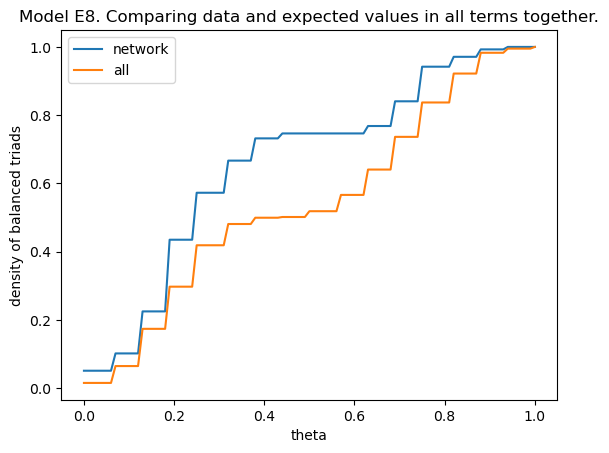

In [33]:
first_sem = 1
last_sem = 6
thetas = np.linspace(0,1,101)

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

agents_len = [len(ord_attributes[semm]) for semm in range(1,last_sem+1)]
net_all_num = np.sum([N*(N-1)/2 for N in agents_len[first_sem-1:last_sem]])

all_bals = np.zeros(len(thetas))
bals = np.zeros(len(thetas))

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    N = agents_len[semm-1]
            
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(ord_attributes[semm], theta, 2)
        bals[i] = bals[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
        
        rho = np.sum(polarities == 1)/2 / N/(N-1)*2
        all_bals[i] = all_bals[i] + (np.power(rho,3) + 3*rho*np.power(1-rho,2) ) * N*(N-1)/2

bals = bals / triads_all_num
all_bals = all_bals / net_all_num

plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Model E8. Comparing data and expected values in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

### Geting true densities for different groups of attributes considered

In [41]:
first_sem = 1
last_sem = 6

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time, ". Started analysis")

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

agents_len = [len(ord_attributes[semm]) for semm in range(1,last_sem+1)]

possible_attrs = list(range(0,8))

df = pd.DataFrame()
df_sum = pd.DataFrame

for G in range(1,9):
    thetas = [i/2/G for i in range(0,2*G)]
#     thetas[-1] = 1.
#     bal_dens = np.zeros(len(thetas))
    
    combs = [comb for comb in itertools.combinations(possible_attrs, G)]
    all_combinations = list(itertools.product(combs, thetas))
    df_G = pd.DataFrame(all_combinations, columns=['Attributes','Theta'])
    df_sum_G = pd.DataFrame({"Attributes": combs})
    
    df_G["G"] = G
    df_sum_G["G"] = G
    df_sum_G["Thetas"] = [tuple(thetas) for _ in range(len(df_sum_G.G))]
    
    bal_dens = np.zeros(len(df_G.index))
    
    rhos = np.zeros([len(df_G.index), last_sem - first_sem + 1])
    
    for ind, row in df_G.iterrows():
        comb = row.Attributes
        theta = row.Theta
                
        for semm in range(first_sem, last_sem+1):
            triads = triads_all[semm-1]

            polarities = calc_link_polarities2(ord_attributes[semm][:, comb], theta, 2)
            bal_dens[ind] = bal_dens[ind] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
            
            N = polarities.shape[0]
            rhos[ind, semm-1] = np.sum(polarities == 1)/2 / N/(N-1)*2
    
    df_G["NumBal"] = bal_dens
    df_G["pD"] = bal_dens / triads_all_num
    df_G["rhos"] = rhos.tolist()
    
    bal_dens2 = np.zeros(len(df_sum_G.index))
    for ind, row in df_sum_G.iterrows():
        comb = row.Attributes
        inds = np.where(df_G.Attributes == comb)
        bal_dens2[ind] = np.sum(df_G.loc[inds].NumBal)
    df_sum_G["SumBal"] = bal_dens2
    
    if len(df) == 0:
        df = df_G
        df_sum = df_sum_G
    else:
        df = pd.concat([df, df_G])
        df.reset_index(inplace = True, drop = True)
        df_sum = pd.concat([df_sum, df_sum_G])
        df_sum.reset_index(inplace = True, drop = True)
    
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print(current_time, ". Finished G =", G, ".")
df

23:05:55 . Started analysis
23:05:57 . Finished G = 1 .
23:06:11 . Finished G = 2 .
23:06:52 . Finished G = 3 .
23:08:03 . Finished G = 4 .
23:09:12 . Finished G = 5 .
23:09:52 . Finished G = 6 .
23:10:05 . Finished G = 7 .
23:10:07 . Finished G = 8 .


,Attributes,Theta,G,NumBal,pD,rhos
0,"(0,)",0.0000,1,127.0,0.920290,"[0.4329896907216495, 0.4816138917262513, 0.399..."
1,"(0,)",0.5000,1,127.0,0.920290,"[0.5670103092783505, 0.6281920326864147, 0.675..."
2,"(1,)",0.0000,1,120.0,0.869565,"[0.3858615611192931, 0.3516343207354443, 0.363..."
3,"(1,)",0.5000,1,120.0,0.869565,"[0.6888281085630128, 0.6912665985699694, 0.676..."
4,"(2,)",0.0000,1,121.0,0.876812,"[0.37786661056175047, 0.4290091930541369, 0.39..."
...,...,...,...,...,...,...
2043,"(0, 1, 2, 3, 4, 5, 6, 7)",0.6875,8,116.0,0.840580,"[0.8638754470860509, 0.9052604698672115, 0.908..."
2044,"(0, 1, 2, 3, 4, 5, 6, 7)",0.7500,8,130.0,0.942029,"[0.9229960025247211, 0.9517364657814096, 0.956..."
2045,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8125,8,134.0,0.971014,"[0.9682305912055544, 0.9816138917262514, 0.978..."
2046,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8750,8,137.0,0.992754,"[0.993477803492531, 0.9956588355464759, 0.9947..."


In [42]:
df_sum

,Attributes,G,Thetas,SumBal
0,"(0,)",1,"(0.0, 0.5)",254.0
1,"(1,)",1,"(0.0, 0.5)",240.0
2,"(2,)",1,"(0.0, 0.5)",242.0
3,"(3,)",1,"(0.0, 0.5)",258.0
4,"(4,)",1,"(0.0, 0.5)",192.0
...,...,...,...,...
250,"(0, 1, 2, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1268.0
251,"(0, 1, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1236.0
252,"(0, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1262.0
253,"(1, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1236.0


In [43]:
# #save, commented out not accidentally do it
# with open('eG_true_densities.pkl', 'wb') as file:
      
#     # A new file will be created
#     pickle.dump((df, df_sum), file)

In [11]:
#open
with open('eG_true_densities.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    print(myvar)
df, df_sum = myvar

# bal_dens_sum = np.sum(test_triads_A8_bal_dens)
# bal_dens_rands_sum = np.array([np.sum(test_triads_A8_bal_dens_rands[j]) for j in range(0,len(test_triads_A8_bal_dens_rands))])

(                    Attributes   Theta  G  NumBal        pD  \
0                         (0,)  0.0000  1   127.0  0.920290   
1                         (0,)  0.5000  1   127.0  0.920290   
2                         (1,)  0.0000  1   120.0  0.869565   
3                         (1,)  0.5000  1   120.0  0.869565   
4                         (2,)  0.0000  1   121.0  0.876812   
...                        ...     ... ..     ...       ...   
2043  (0, 1, 2, 3, 4, 5, 6, 7)  0.6875  8   116.0  0.840580   
2044  (0, 1, 2, 3, 4, 5, 6, 7)  0.7500  8   130.0  0.942029   
2045  (0, 1, 2, 3, 4, 5, 6, 7)  0.8125  8   134.0  0.971014   
2046  (0, 1, 2, 3, 4, 5, 6, 7)  0.8750  8   137.0  0.992754   
2047  (0, 1, 2, 3, 4, 5, 6, 7)  0.9375  8   138.0  1.000000   

                                                   rhos  
0     [0.4329896907216495, 0.4816138917262513, 0.399...  
1     [0.5670103092783505, 0.6281920326864147, 0.675...  
2     [0.3858615611192931, 0.3516343207354443, 0.363...  
3     [0.6

In [72]:
df_rands = pd.DataFrame()
df_sum_rands = pd.DataFrame()

saved = False

In [73]:
first_sem = 1
last_sem = 6
M = 90
disp_every = 0.2

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time, ". Started analysis")

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

agents_len = [len(ord_attributes[semm]) for semm in range(1,last_sem+1)]

possible_attrs = list(range(0,8))
true_id = 0

for G in range(1,9):
    thetas = [i/2/G for i in range(0,2*G)]
#     thetas[-1] = 1.
#     bal_dens = np.zeros(len(thetas))
    
    combs = [comb for comb in itertools.combinations(possible_attrs, G)]
    all_combinations = list(itertools.product(combs, thetas))
    df_rands_G = pd.DataFrame(all_combinations, columns=['Attributes','Theta'])
    df_sum_rands_G = pd.DataFrame({"Attributes": combs})
    
    df_rands_G["G"] = G
    df_sum_rands_G["G"] = G
    df_sum_rands_G["Thetas"] = [tuple(thetas) for _ in range(len(df_sum_rands_G.G))]
    
    bal_dens_rands = np.array([np.zeros([M]) for _ in range(len(df_rands_G.index))])
    
    cnt = 0
    disp_every_printer = disp_every
    for ind, row in df_rands_G.iterrows():
        comb = row.Attributes
        theta = row.Theta
        if df.iloc[true_id].Attributes == comb:
            rhos = df.iloc[true_id].rhos
            true_id += 1
        else:
            print(df.iloc[true_id].Attributes)
            print(comb)
            0/0
        
        for j in range(0,M):  
            for semm in range(first_sem, last_sem+1):
                triads = triads_all[semm-1]  
                N = agents_len[semm-1]
                rho = rhos[semm-1]
                
                polarities_rand = distribute_random_polarities(N, rho)
                bal_dens_rands[ind][j] = bal_dens_rands[ind][j] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

        cnt += 1
        if cnt / len(df_rands_G.index) >= disp_every_printer:
            now = datetime.now()

            current_time = now.strftime("%H:%M:%S")
#             print(disp_every_printer)
            print(current_time, ". Finished ", str(int(cnt / len(df_rands_G.index)*100)), "% of randomized calculations.")
            disp_every_printer += disp_every
#             print(disp_every_printer)
                
        
    df_rands_G["NumBal"] = bal_dens_rands.tolist()
    df_rands_G["pD"] = (bal_dens_rands / triads_all_num).tolist()
    
    bal_dens_rands2 = np.array([np.zeros([M]) for _ in range(len(df_sum_rands_G.index))])
    for ind, row in df_sum_rands_G.iterrows():
        comb = row.Attributes
        inds = np.where(df_rands_G.Attributes == comb)
        bal_dens_rands2[ind] = np.sum([np.array(arr) for arr in df_rands_G.loc[inds].NumBal], axis=0)
#         np.sum(df_rands_G.loc[inds].NumBal)
    df_sum_rands_G["SumBal"] = bal_dens_rands2.tolist()
    
    if len(df_rands) == 0:
        df_rands = df_rands_G
        df_sum_rands = df_sum_rands_G
    else:
        df_rands = pd.concat([df_rands, df_rands_G])
        df_rands.reset_index(inplace = True, drop = True)
        df_sum_rands = pd.concat([df_sum_rands, df_sum_rands_G])
        df_sum_rands.reset_index(inplace = True, drop = True)
    
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print(current_time, ". Finished G =", G, ".")
df_rands

12:16:21 . Started analysis
12:16:26 . Finished  25 % of randomized calculations.
12:16:29 . Finished  43 % of randomized calculations.
12:16:32 . Finished  62 % of randomized calculations.
12:16:36 . Finished  81 % of randomized calculations.
12:16:39 . Finished  100 % of randomized calculations.
12:16:39 . Finished G = 1 .
12:17:15 . Finished  20 % of randomized calculations.
12:17:40 . Finished  40 % of randomized calculations.
12:18:06 . Finished  60 % of randomized calculations.
12:18:32 . Finished  80 % of randomized calculations.
12:18:56 . Finished  100 % of randomized calculations.
12:18:56 . Finished G = 2 .
12:20:10 . Finished  20 % of randomized calculations.
12:21:23 . Finished  40 % of randomized calculations.
12:22:36 . Finished  60 % of randomized calculations.
12:23:50 . Finished  80 % of randomized calculations.
12:25:03 . Finished  100 % of randomized calculations.
12:25:03 . Finished G = 3 .
12:27:07 . Finished  20 % of randomized calculations.
12:29:06 . Finished  

,Attributes,Theta,G,NumBal,pD
0,"(0,)",0.0000,1,"[74.0, 58.0, 75.0, 70.0, 72.0, 67.0, 75.0, 71....","[0.5362318840579711, 0.42028985507246375, 0.54..."
1,"(0,)",0.5000,1,"[64.0, 55.0, 69.0, 66.0, 73.0, 70.0, 73.0, 77....","[0.463768115942029, 0.39855072463768115, 0.5, ..."
2,"(1,)",0.0000,1,"[60.0, 68.0, 71.0, 71.0, 78.0, 67.0, 62.0, 67....","[0.43478260869565216, 0.4927536231884058, 0.51..."
3,"(1,)",0.5000,1,"[74.0, 74.0, 78.0, 73.0, 67.0, 68.0, 75.0, 72....","[0.5362318840579711, 0.5362318840579711, 0.565..."
4,"(2,)",0.0000,1,"[74.0, 64.0, 74.0, 74.0, 63.0, 72.0, 74.0, 70....","[0.5362318840579711, 0.463768115942029, 0.5362..."
...,...,...,...,...,...
2043,"(0, 1, 2, 3, 4, 5, 6, 7)",0.6875,8,"[97.0, 101.0, 101.0, 91.0, 95.0, 92.0, 100.0, ...","[0.7028985507246377, 0.7318840579710145, 0.731..."
2044,"(0, 1, 2, 3, 4, 5, 6, 7)",0.7500,8,"[107.0, 109.0, 115.0, 103.0, 112.0, 110.0, 110...","[0.7753623188405797, 0.7898550724637681, 0.833..."
2045,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8125,8,"[122.0, 127.0, 127.0, 124.0, 132.0, 129.0, 129...","[0.8840579710144928, 0.9202898550724637, 0.920..."
2046,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8750,8,"[124.0, 135.0, 136.0, 135.0, 138.0, 136.0, 137...","[0.8985507246376812, 0.9782608695652174, 0.985..."


In [74]:
saved

False

In [75]:
#open, add and save
if not saved:
    with open('eG_rand_results.pkl', 'rb') as file:

        # Call load method to deserialze
        old_data = pickle.load(file)

    for ind, row in df_rands.iterrows():
        df_rands.loc[ind].NumBal.extend(old_data[0].loc[ind].NumBal)
        df_rands.loc[ind].pD.extend(old_data[0].loc[ind].pD)
    for ind, row in df_sum_rands.iterrows():
        df_sum_rands.loc[ind].SumBal.extend(old_data[1].loc[ind].SumBal)

    with open('eG_rand_results.pkl', 'wb') as file:

        # A new file will be created
        pickle.dump((df_rands, df_sum_rands), file)
    saved = True

In [65]:
# #save, commented out not accidentally do it
# with open('eG_rand_results.pkl', 'wb') as file:
      
#     # A new file will be created
#     pickle.dump((df_rands, df_sum_rands), file)

In [12]:
#open
with open('eG_rand_results.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    print(myvar)
df_rands, df_sum_rands = myvar

# bal_dens_sum = np.sum(test_triads_A8_bal_dens)
# bal_dens_rands_sum = np.array([np.sum(test_triads_A8_bal_dens_rands[j]) for j in range(0,len(test_triads_A8_bal_dens_rands))])

(                    Attributes   Theta  G  \
0                         (0,)  0.0000  1   
1                         (0,)  0.5000  1   
2                         (1,)  0.0000  1   
3                         (1,)  0.5000  1   
4                         (2,)  0.0000  1   
...                        ...     ... ..   
2043  (0, 1, 2, 3, 4, 5, 6, 7)  0.6875  8   
2044  (0, 1, 2, 3, 4, 5, 6, 7)  0.7500  8   
2045  (0, 1, 2, 3, 4, 5, 6, 7)  0.8125  8   
2046  (0, 1, 2, 3, 4, 5, 6, 7)  0.8750  8   
2047  (0, 1, 2, 3, 4, 5, 6, 7)  0.9375  8   

                                                 NumBal  \
0     [74.0, 58.0, 75.0, 70.0, 72.0, 67.0, 75.0, 71....   
1     [64.0, 55.0, 69.0, 66.0, 73.0, 70.0, 73.0, 77....   
2     [60.0, 68.0, 71.0, 71.0, 78.0, 67.0, 62.0, 67....   
3     [74.0, 74.0, 78.0, 73.0, 67.0, 68.0, 75.0, 72....   
4     [74.0, 64.0, 74.0, 74.0, 63.0, 72.0, 74.0, 70....   
...                                                 ...   
2043  [97.0, 101.0, 101.0, 91.0, 95.0, 92.0, 

In [80]:
len(df_rands.iloc[0].NumBal)

100

In [14]:
# np.sum(bal_dens_sum > bal_dens_rands_sum ), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(1000, 1000)

Text(0, 0.5, 'density of balanced triads')

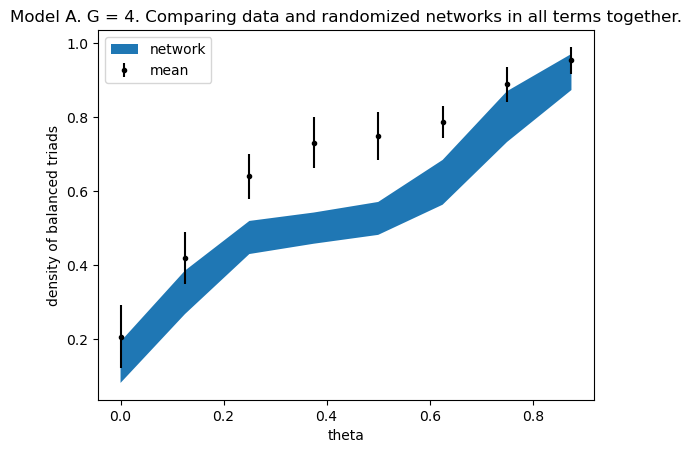

In [76]:
G = 4

inds = df.G == G
df_part = df.loc[inds]
thetas = np.unique(df.Theta[inds])
# print(thetas)

inds_r = df_rands.G == G
df_rands_part = df_rands.loc[inds_r]

pD_means = np.zeros(len(thetas))
pD_stds = np.zeros(len(thetas))

pM_means = np.zeros(len(thetas))
pM_stds = np.zeros(len(thetas))

for it, theta in enumerate(thetas):
    inds2 = df_part.Theta == theta
    pD_means[it] = np.mean(df_part.pD[inds2])
    pD_stds[it] = np.std(df_part.pD[inds2])

    inds2 = df_rands_part.Theta == theta
    pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
    pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])

plt.errorbar(thetas, pD_means, yerr = pD_stds, fmt = 'k.')

plt.fill_between(thetas, pM_means-pM_stds, pM_means+pM_stds)
plt.legend(["network", "mean"])
plt.title("Model A. G = " + str(G) + ". Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

Text(0, 0.5, 'pD-pM')

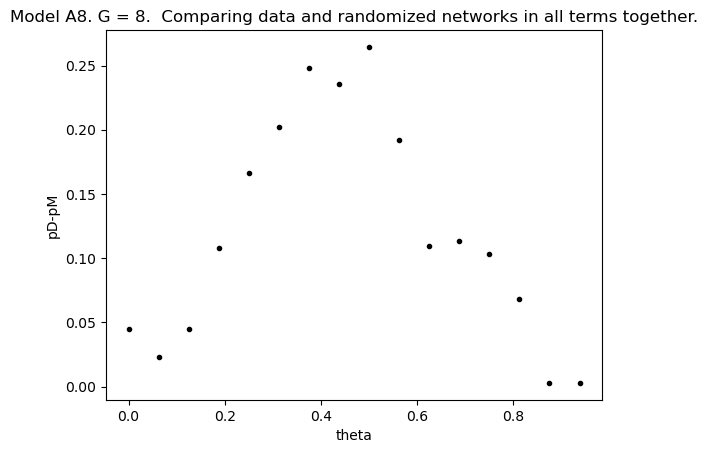

In [67]:

plt.plot(thetas, pD_means - pM_means, 'k.')

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
# plt.legend(["network", "mean"])
plt.title("Model E. G = " + str(G) + ".  Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("pD-pM")

Text(0, 0.5, 'pD-pM')

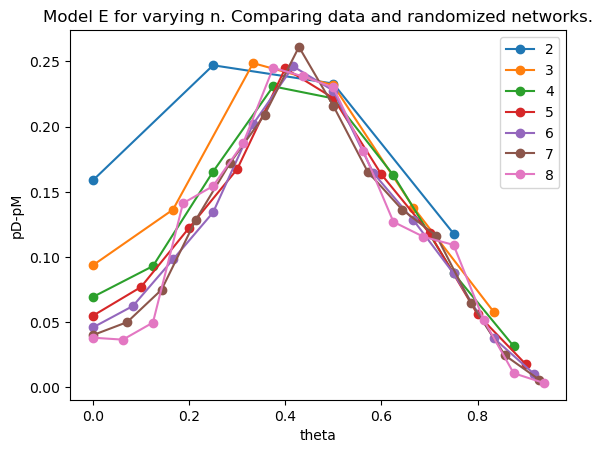

In [25]:
for G in range(2,9):

    inds = df.G == G
    df_part = df.loc[inds]
    thetas = np.unique(df.Theta[inds])
    # print(thetas)

    inds_r = df_rands.G == G
    df_rands_part = df_rands.loc[inds_r]

    pD_means = np.zeros(len(thetas))
    pD_stds = np.zeros(len(thetas))

    pM_means = np.zeros(len(thetas))
    pM_stds = np.zeros(len(thetas))

    for it, theta in enumerate(thetas):
        inds2 = df_part.Theta == theta
        pD_means[it] = np.mean(df_part.pD[inds2])
        pD_stds[it] = np.std(df_part.pD[inds2])

        inds2 = df_rands_part.Theta == theta
        pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
        pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])
    
    plt.plot(thetas, pD_means - pM_means, marker = "o")

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(list(range(2,9)))
plt.title("Model E for varying n. Comparing data and randomized networks.")
plt.xlabel("theta")
plt.ylabel("pD-pM")

Text(0, 0.5, 'pD-pM')

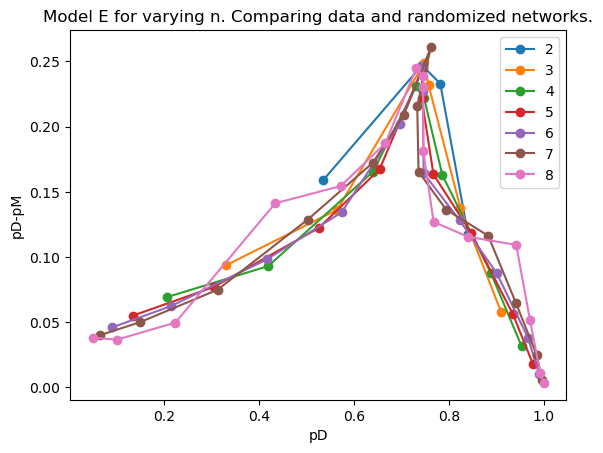

In [26]:
Gs = range(2,9)
for G in Gs:

    inds = df.G == G
    df_part = df.loc[inds]
    thetas = np.unique(df.Theta[inds])
    # print(thetas)

    inds_r = df_rands.G == G
    df_rands_part = df_rands.loc[inds_r]

    pD_means = np.zeros(len(thetas))
    pD_stds = np.zeros(len(thetas))

    pM_means = np.zeros(len(thetas))
    pM_stds = np.zeros(len(thetas))

    for it, theta in enumerate(thetas):
        inds2 = df_part.Theta == theta
        pD_means[it] = np.mean(df_part.pD[inds2])
        pD_stds[it] = np.std(df_part.pD[inds2])

        inds2 = df_rands_part.Theta == theta
        pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
        pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])
    
    plt.plot(pD_means, pD_means - pM_means, marker = "o")

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(list(Gs))
plt.title("Model E for varying n. Comparing data and randomized networks.")
plt.xlabel("pD")
plt.ylabel("pD-pM")

Text(0, 0.5, 'pD-pM')

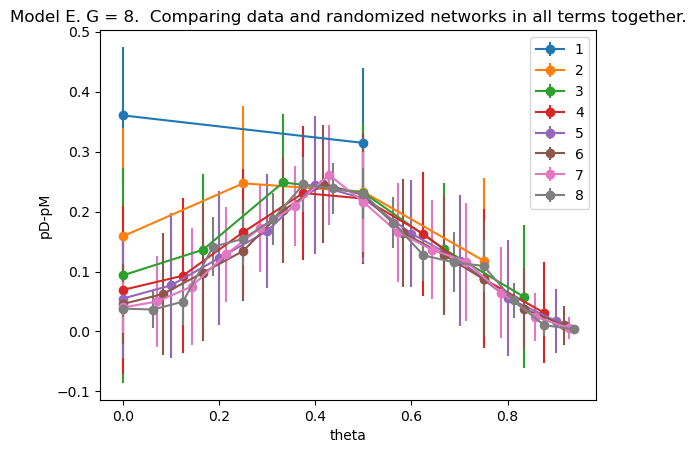

In [83]:
for G in range(1,9):

    inds = df.G == G
    df_part = df.loc[inds]
    thetas = np.unique(df.Theta[inds])
    # print(thetas)

    inds_r = df_rands.G == G
    df_rands_part = df_rands.loc[inds_r]

    pD_means = np.zeros(len(thetas))
    pD_stds = np.zeros(len(thetas))

    pM_means = np.zeros(len(thetas))
    pM_stds = np.zeros(len(thetas))

    for it, theta in enumerate(thetas):
        inds2 = df_part.Theta == theta
        pD_means[it] = np.mean(df_part.pD[inds2])
        pD_stds[it] = np.std(df_part.pD[inds2])

        inds2 = df_rands_part.Theta == theta
        pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
        pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])
    
    plt.errorbar(thetas, pD_means - pM_means, yerr = pM_stds + pD_stds, marker = "o")

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(list(range(1,9)))
plt.title("Model E. G = " + str(G) + ".  Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("pD-pM")

In [56]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

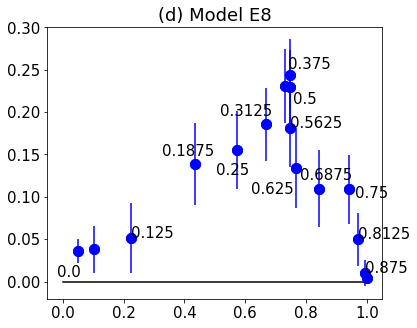

In [20]:
fig, ax = plt.subplots()


chosen_dists = [i/8 for i in range(0,8)]
chosen_dists = [i/16 for i in range(0,16)]

anno_dists = [0, 0.125, 3/16, 4/16, 5/16, 6/16, 0.5, 9/16, 10/16, 11/16, 12/16, 13/16, 14/16]


for i, dist in enumerate(distances):
    if dist not in chosen_dists:
        continue
    dif = pds[i] - pms[i]
    ax.plot(pds[i], dif, color='blue', marker='o', linestyle='', markersize=10, label=str(dist))
    plt.errorbar(x=pds[i], y=dif,yerr=stds[i],  color='blue', marker='o', markersize=10, label=str(dist))
    if dist == 0.75:
        xy = (pds[i] + 0.02, dif-0.01)
    elif dist in [7/8]:
        xy = (pds[i]-0.00, dif + 0.0)
    elif dist in [6/16]:
        xy = (pds[i] + 0.01, dif + 0.02)
    elif dist in [8/16]:
        xy = (pds[i] + 0.01, dif - 0.02)
    elif dist in [1/16, 3/16]:
        xy = (pds[i]-0.11, dif + 0.01)
    elif dist in [11/16]:
        xy = (pds[i]-0.06, dif + 0.01)
    elif dist in [5/16]:
        xy = (pds[i]-0.15, dif + 0.01)
    elif dist in [0, 0.25]:
        xy = (pds[i]-0.07, dif - 0.03)
    elif dist in [0.625]:
        xy = (pds[i]-0.15, dif - 0.03)
#     elif dist == 0:
#         xy = (pds[i]-0.07, dif - 0.03)
    else:
        xy = (pds[i], dif)
    if dist in anno_dists:
        ax.annotate(str(dist),xy=xy)
    #, xytext=(-40,-10), textcoords='offset points')

#plt.rcParams.update({'font.size': 40})
plt.title('(d) Model E8')
fig.set_size_inches(6, 5)
plt.rcParams.update({'font.size': 15})
plt.plot((0,1),(0,0), color='black')


plt.savefig("modelE8v2.pdf",dpi=600,bbox_inches='tight',format='pdf')

with open(f'E8.pkl','wb') as fid:
    pickle.dump(fig, fid)

In [171]:
(pms - pds) / pds

array([-0.70371429, -0.37407143, -0.22835484, -0.31975   , -0.27164557,
       -0.27873913, -0.31528713, -0.3271068 , -0.30791262, -0.24314563,
       -0.17417925, -0.13047414, -0.11579231, -0.0513806 , -0.0099927 ,
       -0.00468116])

Text(0, 0.5, 'density of balanced triads in all sems')

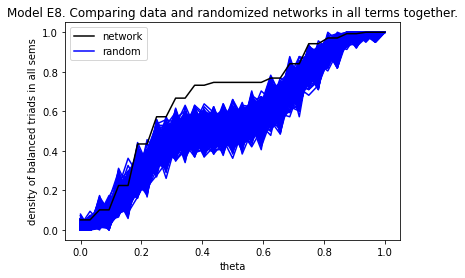

In [55]:
handles_rand = plt.plot(test_E8_all_agents_terms_together_thetas, np.array(test_E8_all_agents_terms_together_bal_dens_rands).T, 'b')
handles_net, = plt.plot(test_E8_all_agents_terms_together_thetas, test_E8_all_agents_terms_together_bal_dens, 'k')
# plt.legend(["network", "random"], handles = [handles_net, handles_rand[0]])
plt.legend([handles_net, handles_rand[0]], ["network", "random"])
plt.title("Model E8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads in all sems")

# p-value analysis

### Second level test¶

What are the exact thetas that have small p-values?


In [17]:
pvals_T = np.zeros(len(df.index))
lens = np.array([len(arr) for arr in df_rands.NumBal])

for ind, row in df.iterrows():    
    pvals_T[ind] = np.sum(df_rands.iloc[ind].NumBal >= df.iloc[ind].NumBal)

df["pvals"] = pvals_T / lens
df

,Attributes,Theta,G,NumBal,pD,rhos,pvals
0,"(0,)",0.0000,1,127.0,0.920290,"[0.4329896907216495, 0.4816138917262513, 0.399...",0.00
1,"(0,)",0.5000,1,127.0,0.920290,"[0.5670103092783505, 0.6281920326864147, 0.675...",0.00
2,"(1,)",0.0000,1,120.0,0.869565,"[0.3858615611192931, 0.3516343207354443, 0.363...",0.00
3,"(1,)",0.5000,1,120.0,0.869565,"[0.6888281085630128, 0.6912665985699694, 0.676...",0.00
4,"(2,)",0.0000,1,121.0,0.876812,"[0.37786661056175047, 0.4290091930541369, 0.39...",0.00
...,...,...,...,...,...,...,...
2043,"(0, 1, 2, 3, 4, 5, 6, 7)",0.6875,8,116.0,0.840580,"[0.8638754470860509, 0.9052604698672115, 0.908...",0.02
2044,"(0, 1, 2, 3, 4, 5, 6, 7)",0.7500,8,130.0,0.942029,"[0.9229960025247211, 0.9517364657814096, 0.956...",0.01
2045,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8125,8,134.0,0.971014,"[0.9682305912055544, 0.9816138917262514, 0.978...",0.06
2046,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8750,8,137.0,0.992754,"[0.993477803492531, 0.9956588355464759, 0.9947...",0.44


In [18]:
G=8
inds = df_rands.G == G
df.loc[inds]

,Attributes,Theta,G,NumBal,pD,rhos,pvals
2032,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0000,8,7.0,0.050725,"[0.004207868714496108, 0.004596527068437181, 0...",0.01
2033,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0625,8,14.0,0.101449,"[0.022932884494003786, 0.022982635342185906, 0...",0.16
2034,"(0, 1, 2, 3, 4, 5, 6, 7)",0.1250,8,31.0,0.224638,"[0.05891016200294551, 0.06537282941777324, 0.0...",0.14
2035,"(0, 1, 2, 3, 4, 5, 6, 7)",0.1875,8,60.0,0.434783,"[0.12497370082053441, 0.12691521961184882, 0.1...",0.00
2036,"(0, 1, 2, 3, 4, 5, 6, 7)",0.2500,8,79.0,0.572464,"[0.2175468125394488, 0.22216547497446373, 0.20...",0.00
2037,"(0, 1, 2, 3, 4, 5, 6, 7)",0.3125,8,92.0,0.666667,"[0.3202188091731538, 0.3319713993871297, 0.316...",0.00
2038,"(0, 1, 2, 3, 4, 5, 6, 7)",0.3750,8,101.0,0.731884,"[0.4283610351357038, 0.4535240040858018, 0.440...",0.00
2039,"(0, 1, 2, 3, 4, 5, 6, 7)",0.4375,8,103.0,0.746377,"[0.5280875236692615, 0.5781409601634321, 0.561...",0.00
2040,"(0, 1, 2, 3, 4, 5, 6, 7)",0.5000,8,103.0,0.746377,"[0.6170839469808541, 0.6887129724208376, 0.668...",0.00
2041,"(0, 1, 2, 3, 4, 5, 6, 7)",0.5625,8,103.0,0.746377,"[0.7102882390069429, 0.7706843718079672, 0.764...",0.00


Text(0, 0.5, 'p-values of second level test')

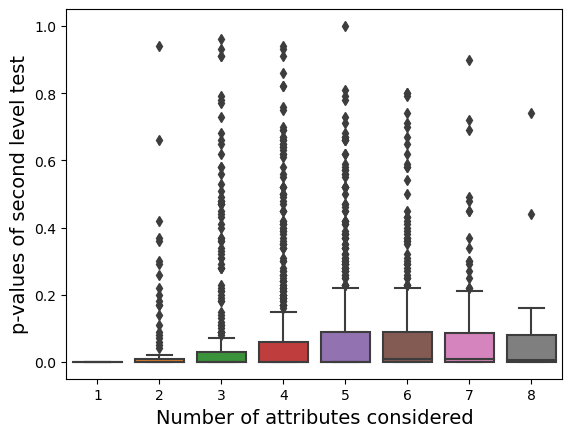

In [89]:
b = sns.boxplot(data = df, x = "G", y = "pvals")

b.set_xlabel("Number of attributes considered", fontsize = 14)
b.set_ylabel("p-values of second level test", fontsize = 14)
# b.set_title("", fontsize = 16)

# b.get_figure()

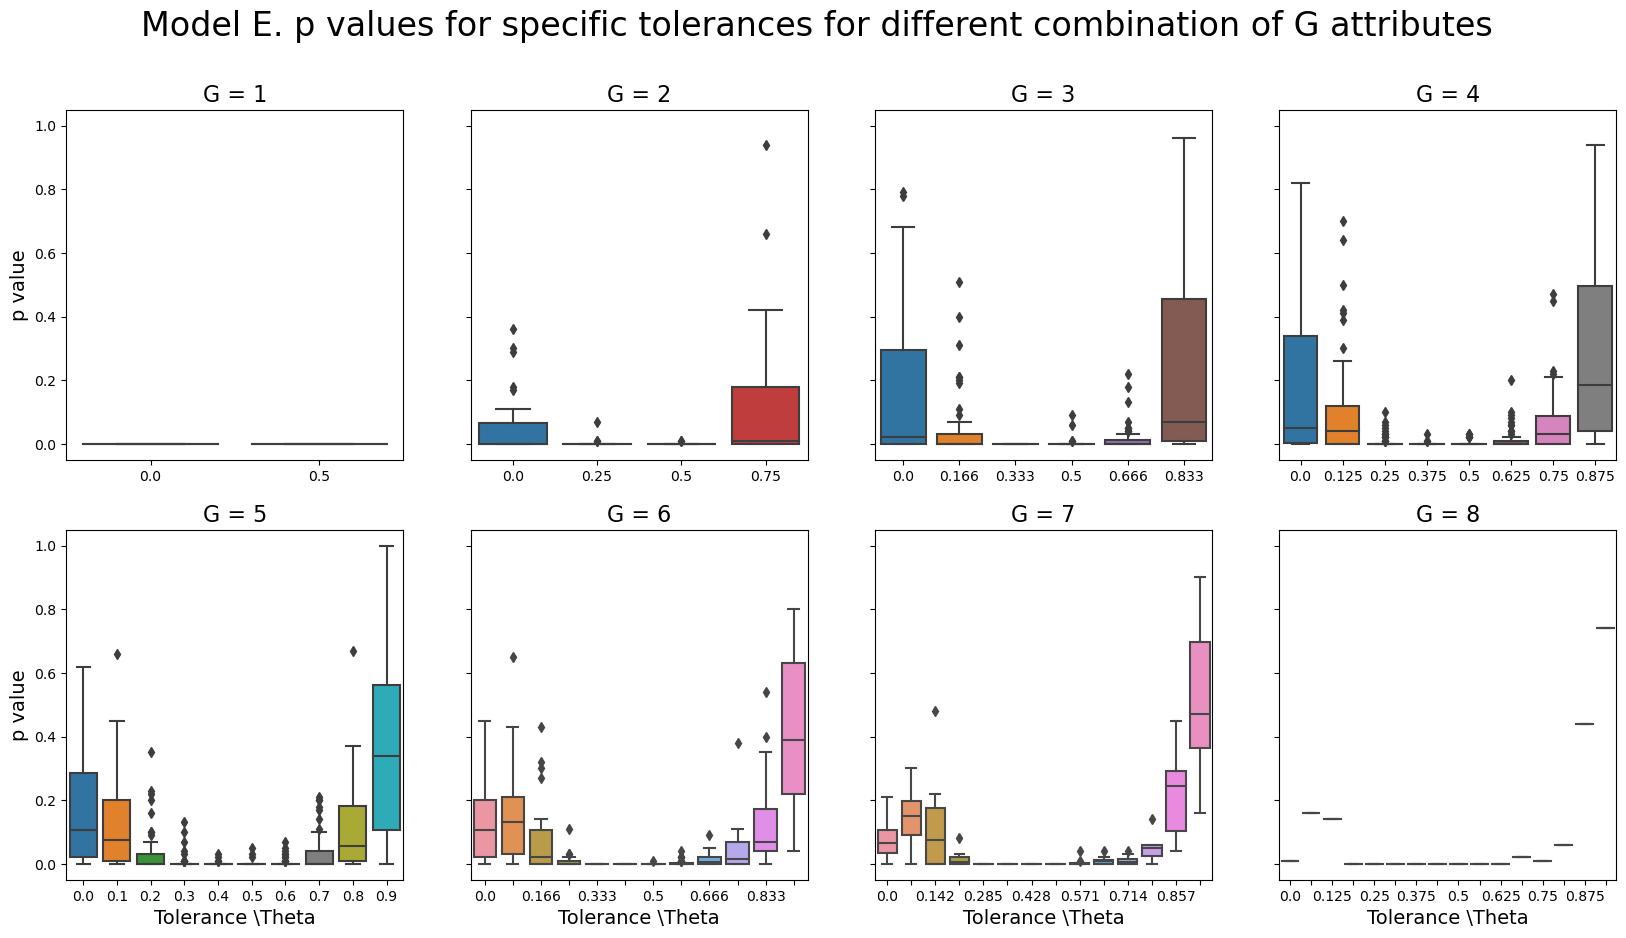

In [91]:
dim1 = 2
dim2 = 4
fig, axs = plt.subplots(dim1, dim2, sharey=True)
fig.set_size_inches(20,10)

fig.suptitle("Model E. p values for specific tolerances for different combination of G attributes", 
            fontsize = 24)

G=1
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        inds = df.G == G
        b = sns.boxplot(ax = axs[a1, a2], data = df.loc[inds], x = "Theta", y = "pvals")

        xtl = b.get_xticklabels()
        
        """Changing the number of decimals printed"""
        for it in range(len(xtl)):
            xt = xtl[it].get_text()
            xt = xt[:5]
            xtl[it].set_text(xt)
            b.set_xticklabels(xtl)
        
        if len(xtl) > 10:
            even = False
            for it in range(len(xtl)):
                if even:
                    xtl[it].set_text("")
                even = not even
            b.set_xticklabels(xtl)
        
        b.set_title("G = " + str(G), fontsize = 16)
        
        if a2 == 0:
            b.set_ylabel("p value", fontsize = 14)
        else:
            b.set_ylabel("", fontsize = 14)
        
        if a1 == 0:
            b.set_xlabel("", fontsize = 14)
        else:
            b.set_xlabel("Tolerance \Theta", fontsize = 14)
        
        G += 1
#         b.set_xlabel("Theta", fontsize = 14)
#         b.set_ylabel("p-values of second level test", fontsize = 14)

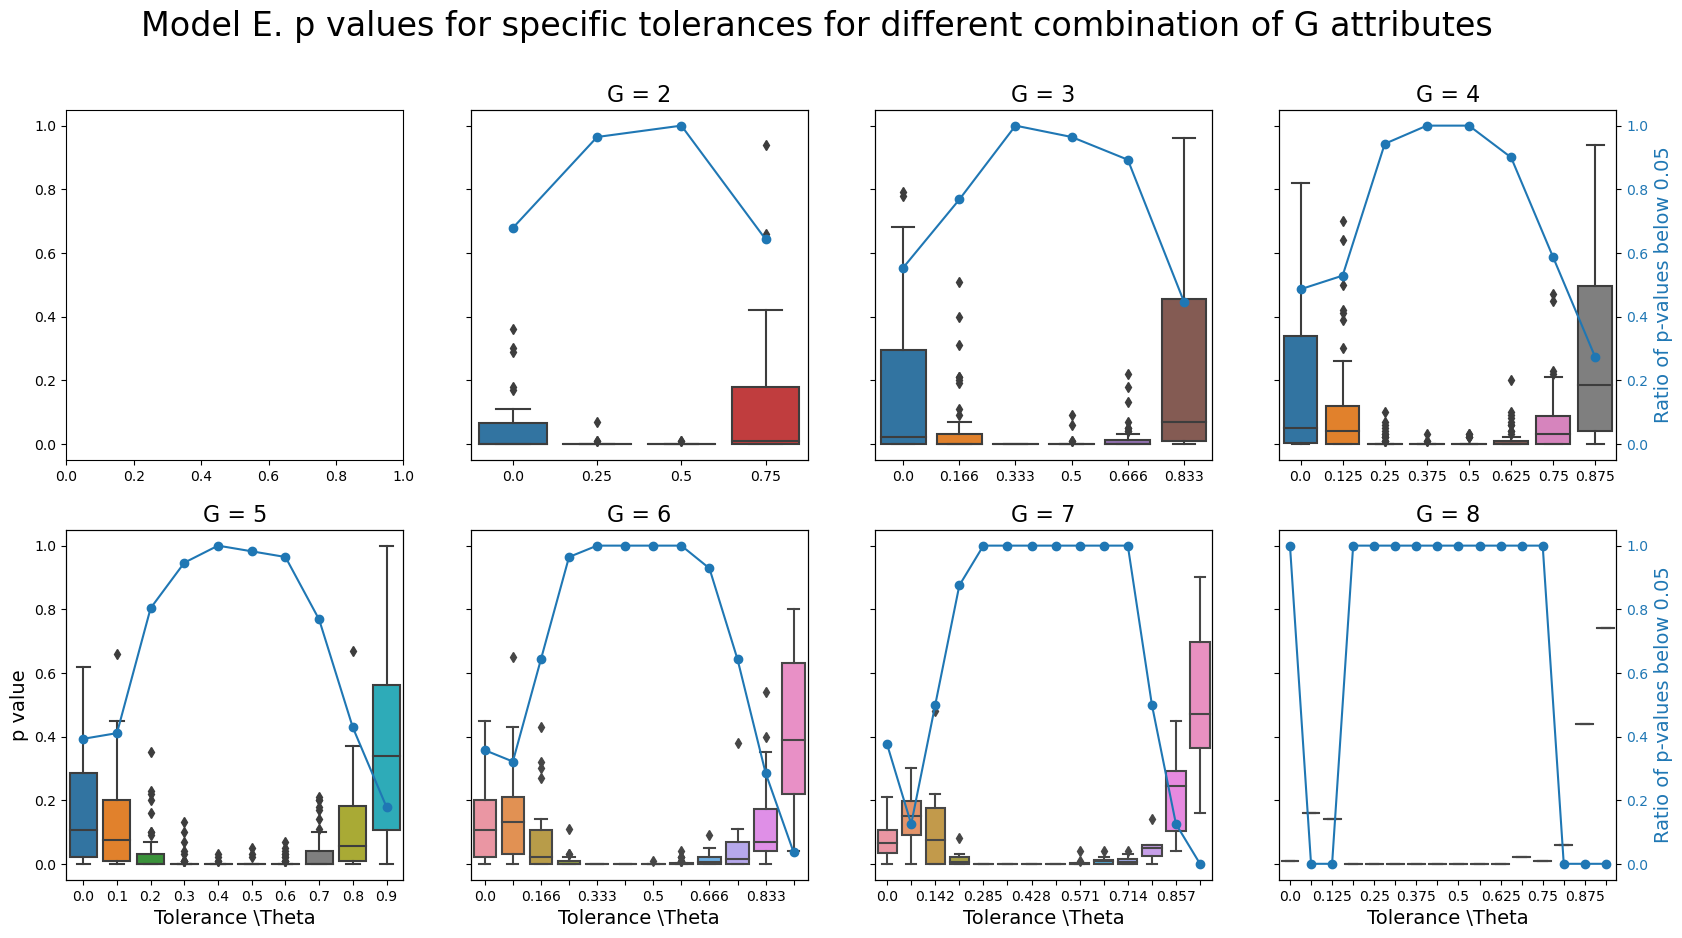

In [23]:
dim1 = 2
dim2 = 4
fig, axs = plt.subplots(dim1, dim2, sharey=True)
fig.set_size_inches(20,10)
secaxes = [] 

fig.suptitle("Model E. p values for specific tolerances for different combination of G attributes", 
            fontsize = 24)

G=2
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        if a1==0 and a2 == 0:
            continue
        inds = df.G == G
        
        thetas = np.unique(df.loc[inds].Theta)
        
        prob_reject_2lvl = np.zeros(len(thetas))
        
        for it, theta in enumerate(thetas):
            inds2 = df.loc[inds].Theta == theta
            comb_cnt = len(df.loc[inds].loc[inds2].pvals)
            prob_reject_2lvl[it] = np.sum(df.loc[inds].loc[inds2].pvals < 0.05) / comb_cnt
        
        b = sns.boxplot(ax = axs[a1, a2], data = df.loc[inds], x = "Theta", y = "pvals")

        ax2 = b.twinx()
        secaxes.append(ax2)
        if G > 1:
            ax2.sharey(secaxes[0])
        
        ax2.plot(prob_reject_2lvl, marker="o", color = "tab:blue")
        # ax2.set_xlabel("Number of attributes considered", fontsize = 14)
        ax2.tick_params(axis='y', labelcolor="tab:blue")   
        
        xtl = b.get_xticklabels()
        
        """Changing the number of decimals printed"""
        for it in range(len(xtl)):
            xt = xtl[it].get_text()
            xt = xt[:5]
            xtl[it].set_text(xt)
            b.set_xticklabels(xtl)
        
        if len(xtl) > 10:
            even = False
            for it in range(len(xtl)):
                if even:
                    xtl[it].set_text("")
                even = not even
            b.set_xticklabels(xtl)
        
        b.set_title("G = " + str(G), fontsize = 16)
        
        if a2 == 0:
            b.set_ylabel("p value", fontsize = 14)
        else:
            b.set_ylabel("", fontsize = 14)
        
        if a1 == 0:
            b.set_xlabel("", fontsize = 14)
        else:
            b.set_xlabel("Tolerance \Theta", fontsize = 14)
            
        if a2 == 3:
            ax2.set_ylabel("Ratio of p-values below 0.05", fontsize = 14, color = "tab:blue")
        else:
#             ax2.get_yaxis().set_ticks([]) 
            ax2.get_yaxis().set_visible(False) 
            ax2.set_ylabel("")
        
        G += 1
#         b.set_xlabel("Theta", fontsize = 14)
#         b.set_ylabel("p-values of second level test", fontsize = 14)

In [48]:
np.sum(bal_dens_sum > bal_dens_rands_sum ), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(1000, 1000)

Text(0, 0.5, 'density of balanced triads')

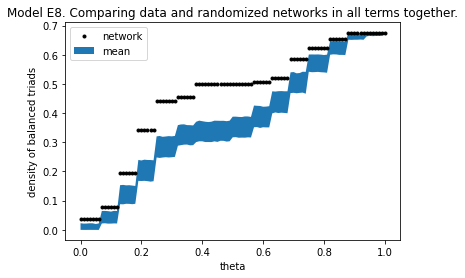

In [50]:
mean_vals = np.mean(np.array(test_E8_all_agents_terms_together_bal_dens_rands2).T,1)
std_vals = np.std(np.array(test_E8_all_agents_terms_together_bal_dens_rands2).T,1)

plt.plot(test_E8_all_agents_terms_together_thetas2, test_E8_all_agents_terms_together_bal_dens2, 'k.')

plt.fill_between(test_E8_all_agents_terms_together_thetas2, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Model E8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [128]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] >= bal_dens[i])

pvals_T

array([  37.,   30.,  121.,  132.,  122.,  124.,    1.,    3.,    0.,
          1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    5.,    1.,   10.,    8.,    0.,    1.,   51.,
         48.,  418.,  407.,  635.,  615., 1000.])

In [129]:
[(theta, pval) for theta, pval in zip(thetas, pvals_T) if pval < 50]

[(0.0, 37.0),
 (0.03125, 30.0),
 (0.1875, 1.0),
 (0.21875, 3.0),
 (0.25, 0.0),
 (0.28125, 1.0),
 (0.3125, 0.0),
 (0.34375, 0.0),
 (0.375, 0.0),
 (0.40625, 0.0),
 (0.4375, 0.0),
 (0.46875, 0.0),
 (0.5, 0.0),
 (0.53125, 0.0),
 (0.5625, 0.0),
 (0.59375, 0.0),
 (0.625, 5.0),
 (0.65625, 1.0),
 (0.6875, 10.0),
 (0.71875, 8.0),
 (0.75, 0.0),
 (0.78125, 1.0),
 (0.84375, 48.0)]

In [134]:
pvals_T2 = [pvals_T[i] + pvals_T[i+1] for i in range(0, len(thetas)-1, 2)]

In [160]:
rejected = np.sort(pvals_T2) / pvals_T[-1] / 2 < 0.05/np.array(range(len(pvals_T2), 0, -1))
rejected

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False])

In [161]:
np.argsort(pvals_T2)

array([ 5,  6,  7,  8,  9,  4, 12,  3, 10, 11,  0, 13,  2,  1, 14, 15])

In [163]:
np.sort(np.array(distances)[np.argsort(pvals_T2)][rejected])

array([0.1875, 0.25  , 0.3125, 0.375 , 0.4375, 0.5   , 0.5625, 0.625 ,
       0.75  ])

In [168]:
[pval / 2000 for pval in pvals_T2]

[0.0335,
 0.1265,
 0.123,
 0.002,
 0.0005,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.003,
 0.009,
 0.0005,
 0.0495,
 0.4125,
 0.625]

# Sum of ranks analysis

Let's calculate a rank for a given threshold for each series for randomized datasets and let's what is the distribution of these values. Is it normal?

What is the prob. that the sum of ranks for RL dataset is larger than for randomized datasets? 

In [106]:
def calc_rank(vals, val):
    """
    Includes val in vals array sorts it and calculates rank for the val.
    """
    all_vals = np.append(vals, val)
    
    all_ranks = stats.rankdata(all_vals)
    return all_ranks[-1]

def calc_ranks(vals, val = []):
    """
    Calculated ranks and allows to include one more value. 
    """
    all_vals = np.append(vals, val)
    
    all_ranks = stats.rankdata(all_vals)
    if np.isscalar(val):
        return all_ranks[0:-1], all_ranks[-1]
    else:
        return all_ranks, []

def get_important_theta_values(thetas, bal_dens_rands, bal_dens = [], distances = [i/16 for i in range(0,16)]):
    """
    There are only 16 (17) distinct thetas. So we do not need all the values. 
    """
    pds = np.array([bal_dens[np.where(thetas >= distances[i])[0][0]] for i in range(0, len(distances))])
    rds = np.array([[bal_dens_rands[j][np.where(thetas >= distances[i])[0][0]] for i in range(0, len(distances))] for j in range(0, len(bal_dens_rands))])
    return pds, rds

def calc_ranks_thetas(bal_dens_rands, bal_dens = []):
    M, num_thetas = bal_dens_rands.shape
#     print(M); 
#     print(num_thetas)
    rl_rank = np.zeros(num_thetas)
    rand_ranks = np.zeros([num_thetas, M])
    
    for theta_ind in range(0, num_thetas):
        vals = [bal_dens_rands[i][theta_ind] for i in range(0, M)]
        if len(bal_dens) > 0:
            val = bal_dens[theta_ind]
        else:
            val = []
        
        rand_ranks[theta_ind], rl_rank[theta_ind] = calc_ranks(vals, val)
    return rand_ranks, rl_rank

In [107]:
test_E8_all_agents_terms_together_bal_dens_rands

array([[0.05797101, 0.04347826, 0.06521739, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.02898551, 0.00724638, ..., 1.        , 0.98550725,
        1.        ],
       [0.        , 0.00724638, 0.05797101, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.01449275, 0.01449275, 0.08695652, ..., 1.        , 1.        ,
        1.        ],
       [0.02173913, 0.02173913, 0.03623188, ..., 0.98550725, 1.        ,
        1.        ],
       [0.01449275, 0.        , 0.06521739, ..., 1.        , 1.        ,
        1.        ]])

In [122]:
distances = [i/16 for i in range(0,16)]
pds = np.array([test_E8_all_agents_terms_together_bal_dens[np.where(test_E8_all_agents_terms_together_thetas >= distances[i])[0][0]] for i in range(0, len(distances))])
rds = np.array([[test_E8_all_agents_terms_together_bal_dens_rands[j][np.where(test_E8_all_agents_terms_together_thetas >= distances[i])[0][0]] for i in range(0, len(distances))] for j in range(0, len(test_E8_all_agents_terms_together_bal_dens_rands))])
    

vals = [rds[i][0] for i in range(0, len(rds))]
val = pds[0]

calc_ranks(vals, val)

(array([ 992.5,  115.5,  115.5,  569. ,  569. ,  569. ,  975.5,  723.5,
         115.5,  355.5,  569. ,  841.5,  723.5,  841.5,  115.5,  723.5,
         355.5,  569. ,  723.5,  115.5,  841.5,  915. ,  569. ,  355.5,
         115.5,  569. ,  355.5,  115.5,  115.5,  355.5,  355.5,  115.5,
         355.5,  355.5,  115.5,  841.5,  355.5,  723.5,  723.5,  841.5,
         569. ,  115.5,  115.5,  115.5,  115.5,  723.5,  841.5,  841.5,
         569. ,  355.5,  723.5,  992.5,  723.5,  841.5,  841.5,  915. ,
         115.5,  723.5,  355.5,  355.5,  115.5,  355.5,  569. ,  723.5,
         115.5,  355.5,  569. ,  355.5,  841.5,  569. ,  355.5,  115.5,
         723.5,  115.5,  355.5,  355.5,  569. ,  115.5,  355.5,  569. ,
         115.5,  975.5,  355.5,  355.5,  355.5,  841.5,  355.5,  115.5,
         355.5,  115.5,  115.5,  115.5,  569. ,  999.5,  355.5,  569. ,
         115.5,  569. ,  569. ,  915. ,  569. ,  355.5,  115.5,  841.5,
         115.5,  723.5,  950. ,  569. ,  115.5,  355.5,  355.5, 

In [123]:
rand_ranks, rl_rank = calc_ranks_thetas(rds, pds)

In [124]:
sums = np.sum(rand_ranks,0)

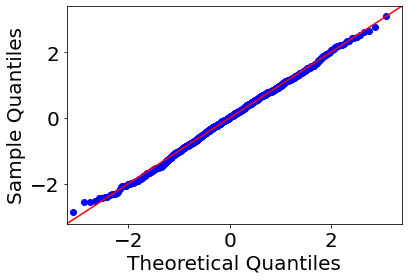

ShapiroResult(statistic=0.997944712638855, pvalue=0.26024341583251953)

In [125]:
sm.qqplot((sums - np.mean(sums)) / np.std(sums), line ='45')
py.show()
stats.shapiro(sums)

In [126]:
np.sum(sums < np.sum(rl_rank)), sums, np.sum(rl_rank)

(1000,
 array([10963.5,  7918.5,  7150. ,  7461.5,  7683.5,  8061. ,  7300.5,
         8159.5,  6549.5,  9341.5,  8662.5,  8607.5,  7176. ,  9300.5,
         7809.5,  7699. ,  7478. ,  9000.5,  8891.5,  6689.5,  8420. ,
         6515.5,  7360.5,  8826. ,  7293. ,  5304.5,  8691. ,  7159.5,
         7785. ,  8319.5,  8083.5,  7183.5,  7606.5,  7241. ,  6777. ,
         9646. ,  7320. ,  7327. ,  9150.5, 10629.5,  7539. ,  9444. ,
         7321.5,  9359. ,  7013. ,  8487.5,  8089.5,  9036.5,  7214. ,
         9187.5,  8364. ,  7936. ,  9704.5,  7675.5,  6356.5,  8808. ,
         8728. ,  9848. ,  5264.5,  8538.5,  6260. ,  9629.5,  6568. ,
         7641.5,  7972.5,  7013.5,  8008. ,  8694. ,  7658. ,  9072.5,
         7345. ,  8949.5,  9523. ,  6252. ,  5316. ,  9187.5,  8509.5,
         6378.5,  7887.5,  9236.5,  7722. ,  8102.5,  6250.5,  6476.5,
         7909. ,  7427. ,  7348. ,  4642. ,  8056. ,  6633. ,  7889.5,
         8790.5,  9466. ,  6086.5,  9160. ,  5023. ,  7378.5,  7792. ,

In [127]:
np.max(sums)

11641.0